# Part 1
Objective: Understand the relationship between product categories and their best-seller status.

Create a crosstab between the product category and the isBestSeller status.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")




In [53]:
cross_tab = pd.crosstab(df['category'], df['isBestSeller'])
cross_tab



isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?
- Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [54]:
cross_tab = cross_tab.reset_index()
cross_tab["Proportion"] = cross_tab[True] / cross_tab[False] *100
cross_tab = cross_tab.sort_values(by="Proportion", ascending=False)
#cross_tab_2 = cross_tab.drop(columns=["level_0",  "index"])

cross_tab.head(5)


isBestSeller,category,False,True,Proportion
109,Grocery,9008,556,6.172291
254,Smart Home Security & Lighting,98,6,6.122449
126,Health & Personal Care,9017,552,6.121770
185,Mobile Phone Accessories,248,11,4.435484
229,Power & Hand Tools,8353,306,3.663354


Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [55]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")
print("Expected frequencies:\n", expected)

# The p-value is 0, which is far below any typical significance level (e.g., 0.05).
# There is a statistically significant association between the product category and whether an item is a best-seller.

Chi-square statistic: 36540.20270061387
Degrees of freedom: 295
P-value: 0.0
Expected frequencies:
 [[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.46598

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [56]:
import numpy as np

n = np.sum(expected)
k = dof + 1 

cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print("Total observations (n):", n)
print("Cramér's V:", cramers_v)

# A Cramér’s V of about 0.0071 indicates a very weak association between best-seller status and category.
# To interpret:
# Cramér’s V ranges from 0 to 1:
#   0 means no association at all.
#   1 means a perfect association.
# Values close to 0 (like 0.0071) mean the variables are almost independent — knowing the category tells you very little about best-seller status, and vice versa.
# So, even though the chi-square test might be statistically significant (due to very large sample size), 
# the actual strength of the relationship is practically negligible.
# In simple terms, category doesn’t strongly predict whether something is a best-seller.


Total observations (n): 2443651.0
Cramér's V: 0.007119588254008425


Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

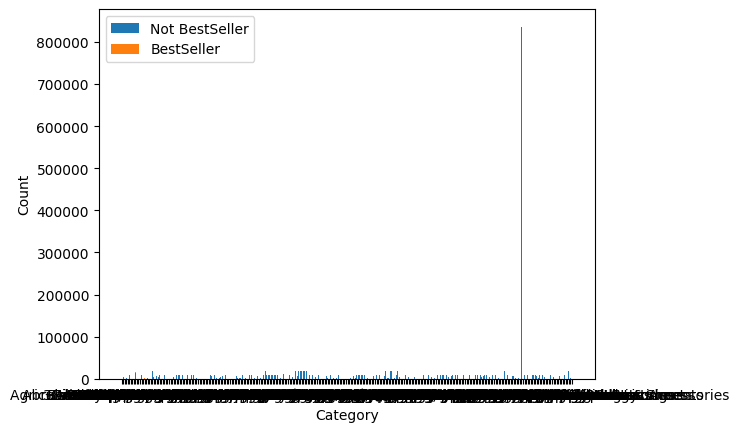

In [57]:
df.head(5)

cross_tab = pd.crosstab(df['category'], df['isBestSeller'])
indices = range(len(cross_tab))
bar_width = 0.5


plt.bar(indices, cross_tab[False], width=bar_width, label='Not BestSeller')
plt.bar(indices, cross_tab[True], bottom=cross_tab[False], width=bar_width, label='BestSeller')

plt.xticks(indices, cross_tab.index)  
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.show()

# Part 2c
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.
For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [58]:
df.head(5)

iqr_price = df["price"].quantile(0.75) - df["price"].quantile(0.25)
median = df["price"].median()

filtered_iqr_df = df[df["price"] > median - 1.5 * iqr_price]
filtered_iqr_df = filtered_iqr_df[filtered_iqr_df["price"] < median + 1.5 * iqr_price]

max_filtered_price = filtered_iqr_df["price"].max()
max_unfiltered_price = df["price"].max()
print(f"max_filtered_price {max_filtered_price}")
print(f"max_unfiltered_price {max_unfiltered_price}")

max_filtered_price 73.08
max_unfiltered_price 100000.0


Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

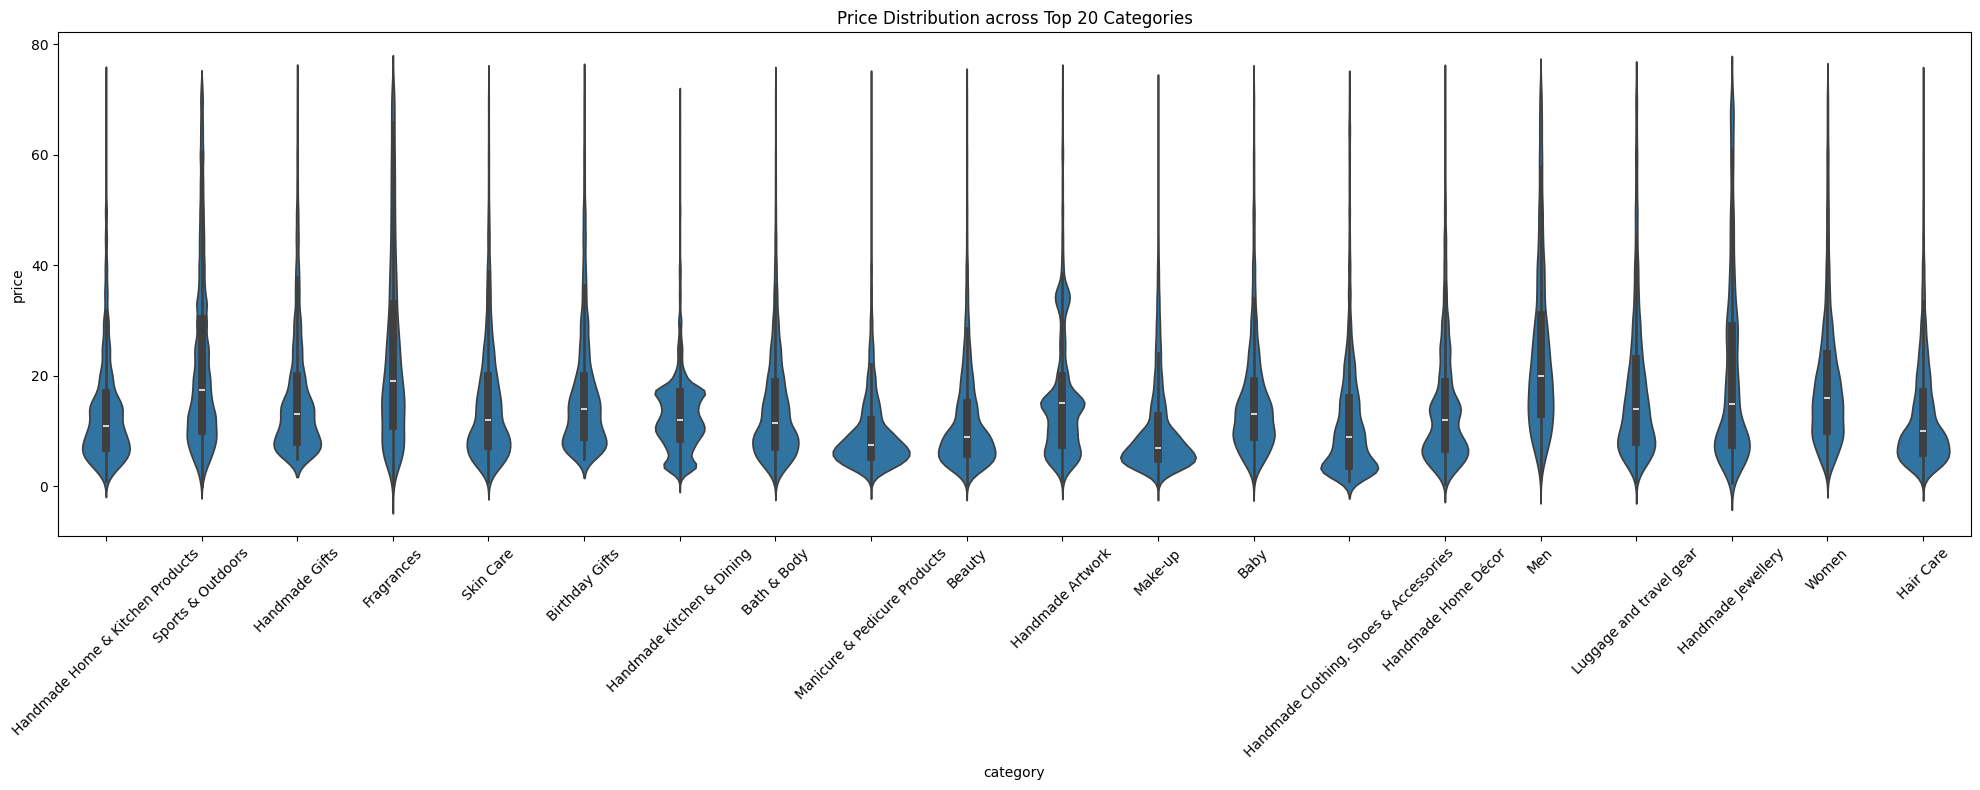

In [59]:

top_categories = filtered_iqr_df['category'].value_counts().head(20).index
filtered_df = filtered_iqr_df[filtered_iqr_df['category'].isin(top_categories)]

plt.figure(figsize=(20, 8))
sns.violinplot(x='category', y='price', data=filtered_df)
plt.xticks(rotation=45)  # rotate x labels for better readability
plt.title('Price Distribution across Top 20 Categories')
plt.tight_layout()
plt.show()



Which product category tends to have the highest median price? Don't filter here by top categories.

In [60]:
median_price_per_cat = filtered_iqr_df.groupby("category")["price"].median().sort_values(ascending=False)
median_price_per_cat

## Boxing Shoes and Motherboards tend to have thte highest median price

category
Boxing Shoes             67.000
Motherboards             60.280
Tablets                  60.080
Streaming Clients        57.645
Desktop PCs              55.340
                          ...  
Adapters                  7.050
Signs & Plaques           6.990
Make-up                   6.990
Arts & Crafts             5.990
Office Paper Products     4.370
Name: price, Length: 296, dtype: float64

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

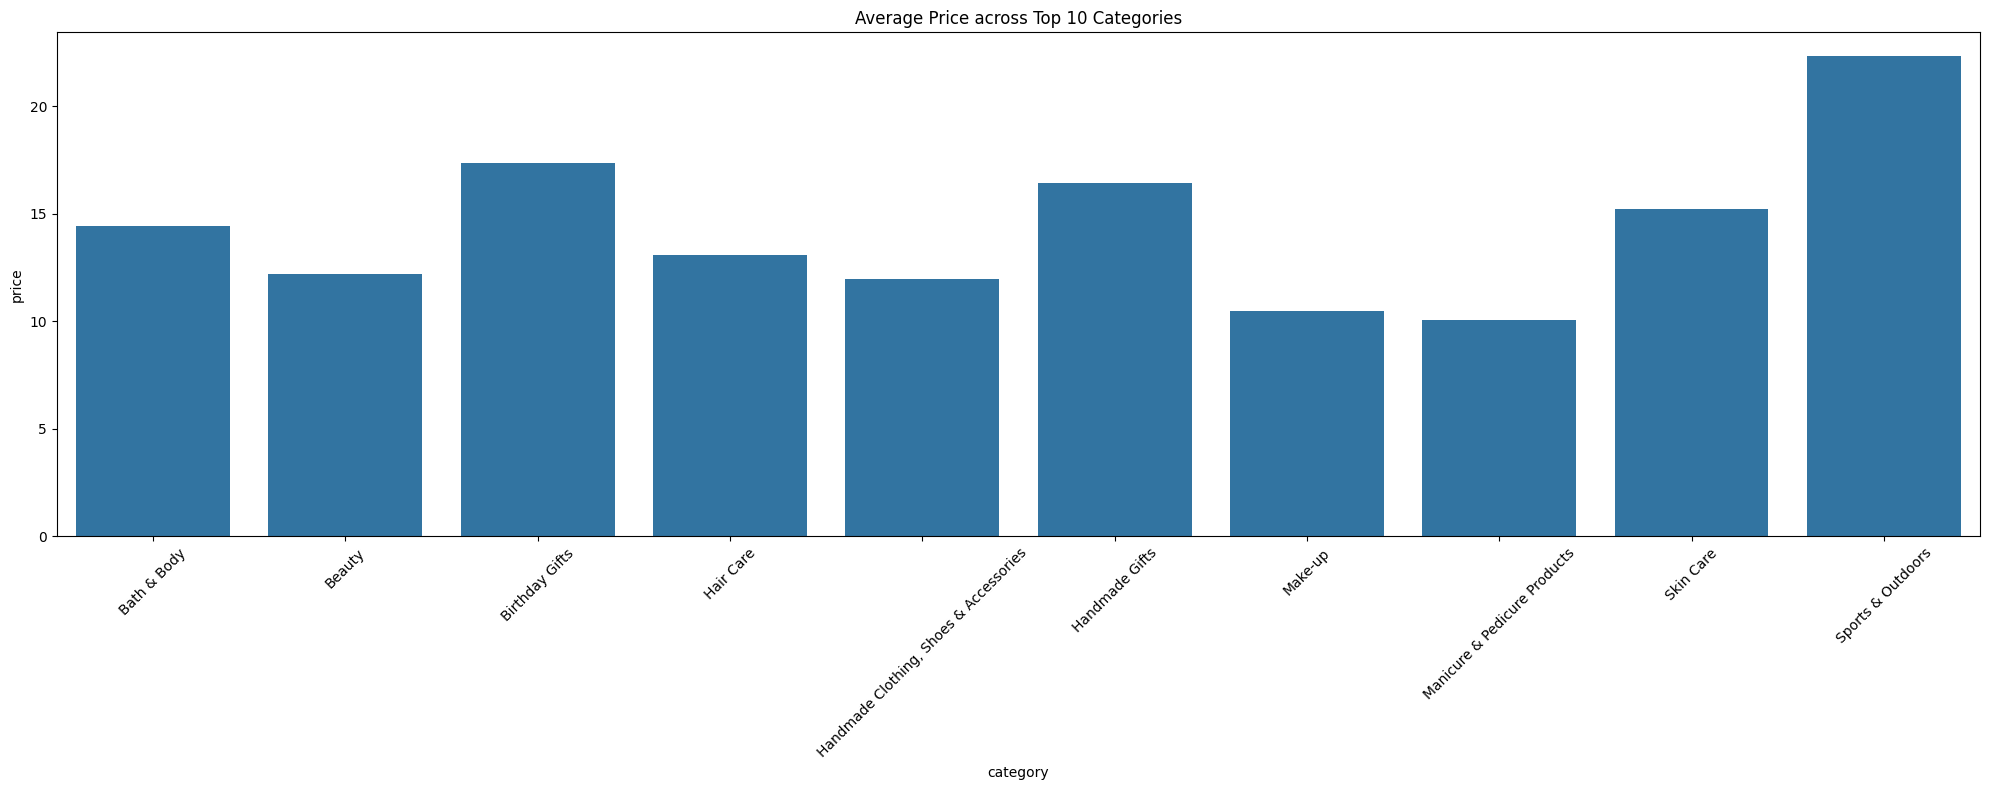

In [61]:
top_10_categories = filtered_iqr_df['category'].value_counts().head(10).index

filtered_df = filtered_iqr_df[filtered_iqr_df['category'].isin(top_10_categories)]
avg = filtered_df.groupby("category")["price"].mean().reset_index()


plt.figure(figsize=(20, 8))
sns.barplot(x='category', y='price', data=avg)
plt.xticks(rotation=45)  # rotate x labels for better readability
plt.title('Average Price across Top 10 Categories')
plt.tight_layout()
plt.show()


Which product category commands the highest average price? Don't filter here by top categories.

In [62]:
highest_avg = filtered_iqr_df.groupby("category")["price"].mean().reset_index()
highest_avg.sort_values(by="price", ascending=False)
# Boxing Shoes	has the highest average price with 58.027986

,category,price
34,Boxing Shoes,58.027986
190,Motherboards,55.988667
108,Graphics Cards,52.049722
267,Streaming Clients,51.905008
133,Hockey Shoes,51.629451
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.180654
8,Arts & Crafts,7.942549


Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

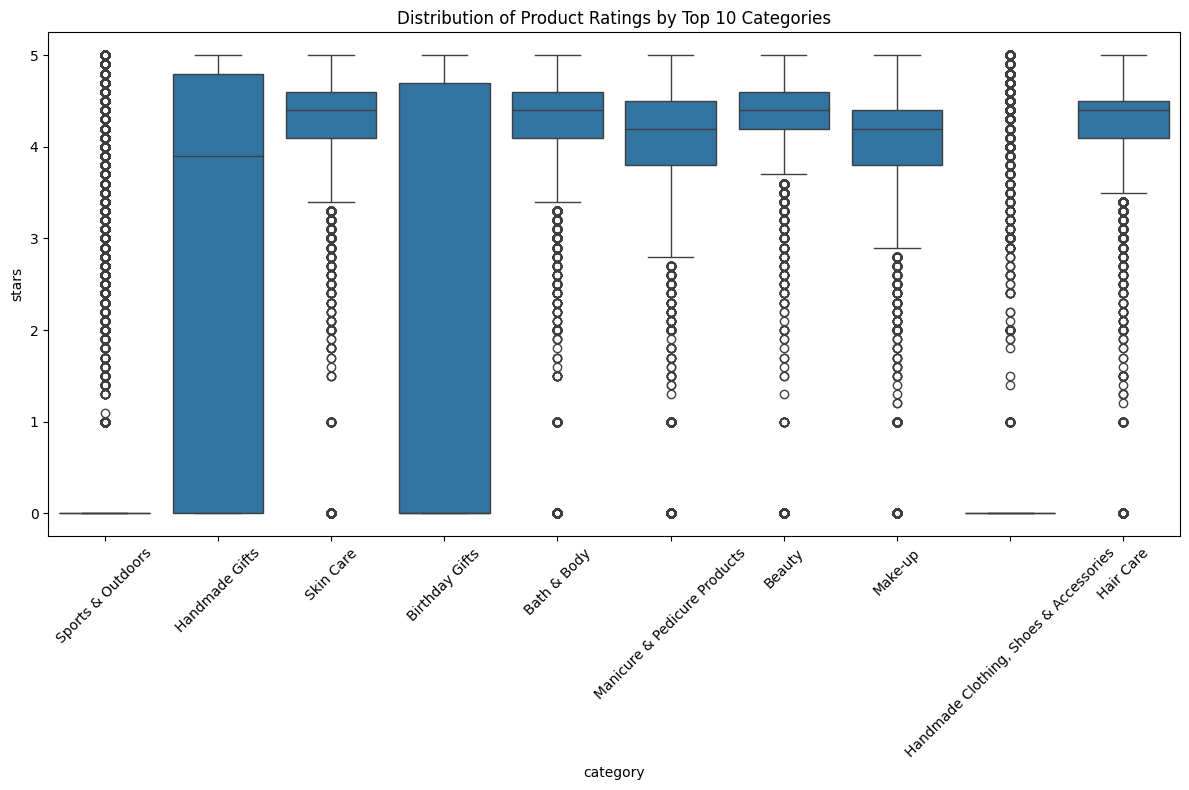

In [63]:

top_10_categories = filtered_iqr_df['category'].value_counts().head(10).index
filtered_df = filtered_iqr_df[filtered_iqr_df['category'].isin(top_10_categories)]

filtered_df.head()

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Distribution of Product Ratings by Top 10 Categories')
plt.tight_layout()
plt.show()

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [64]:
highest_median = filtered_iqr_df.groupby("category")["stars"].median().reset_index()

highest_median = highest_median.sort_values(by="stars", ascending=False)
highest_median

# computer memory tends to receive the highest median rating from customers

,category,stars
56,Computer Memory,4.7
25,"Beer, Wine & Spirits",4.6
132,Hobbies,4.6
209,Office Paper Products,4.6
157,Kids' Play Figures,4.6
...,...,...
271,"Synthesisers, Samplers & Digital Instruments",0.0
274,Tablets,0.0
3,Action Cameras,0.0
1,3D Printing & Scanning,0.0


# Part 3
Objective: Analyze how product ratings (stars) correlate with product prices.

In [65]:
correlation = df['price'].corr(df['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")

# slight negative correlation but not strong (-0.12490673262148386)

Correlation coefficient between price and stars: -0.12490673262148386


Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

<Axes: xlabel='stars', ylabel='price'>

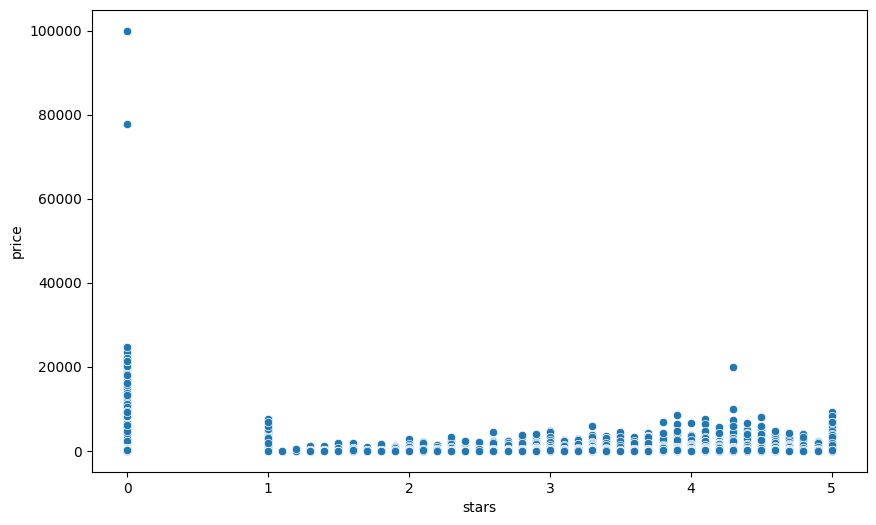

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="stars", y="price", data=df)

Use a correlation heatmap to visualize correlations between all numerical variables.

<Axes: >

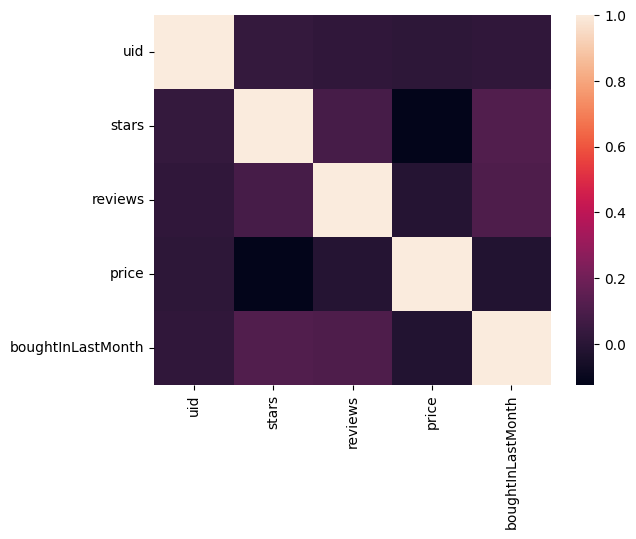

In [72]:
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()
corr
sns.heatmap(corr)

Examine if product prices typically follow a normal distribution using a QQ plot.

Text(0.5, 1.0, 'QQ Plot of Product Prices')

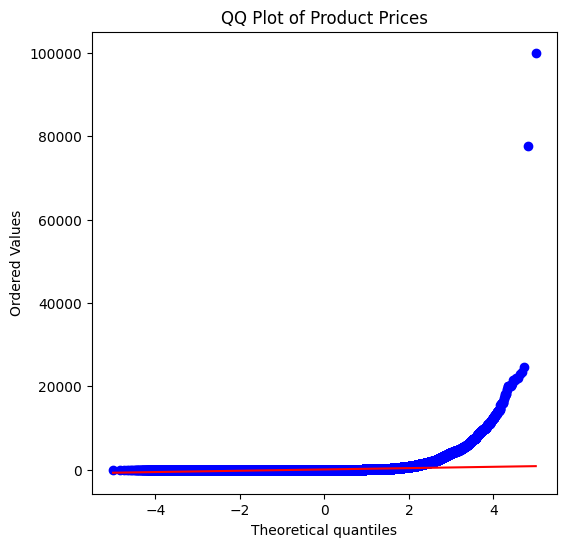

In [73]:
import scipy.stats as stats

prices = df['price'].dropna() 
plt.figure(figsize=(6, 6))
stats.probplot(prices, dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')